# Nuestra primera red neuronal

El problema que resolveremos es convertir de grados Celsius a Fahrenheit, donde la fórmula aproximada es:

$$ f = c \times 1.8 + 32 $$

Por supuesto, sería bastante sencillo crear una función convencional en Python que realice directamente este cálculo, pero eso no sería aprendizaje automático...

En su lugar, le daremos a TensorFlow algunos valores de ejemplo en Celsius (0, 8, 15, 22, 38) y sus valores correspondientes en Fahrenheit (32, 46, 59, 72, 100). Luego, entrenaremos un modelo que descubra la fórmula mencionada a través del proceso de entrenamiento.

## Tensorflow

Plataforma de extremo a extremo que facilita tanto la creación como la implementación de modelos de aprendizaje automático.

In [1]:
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

2025-04-07 00:06:17.201109: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-07 00:06:17.990109: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Datos de entrenamiento

Creamos 2 listas `celsius_q` and `fahrenheit_a` que usaremos para entrenar nuestro modelo.

In [3]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} grados Celsius = {} grados Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 grados Celsius = -40.0 grados Fahrenheit
-10.0 grados Celsius = 14.0 grados Fahrenheit
0.0 grados Celsius = 32.0 grados Fahrenheit
8.0 grados Celsius = 46.0 grados Fahrenheit
15.0 grados Celsius = 59.0 grados Fahrenheit
22.0 grados Celsius = 72.0 grados Fahrenheit
38.0 grados Celsius = 100.0 grados Fahrenheit


### Terminología básica

 - **Característica** — Entrada al modelo, en este caso, un valor único - los grados en Celsius.

 - **Etiquetas** — La salida de nuestro modelo. En este caso, un valor único — los grados en Fahrenheit.

 - **Ejemplo** — Un par entrada/salida usado durante el entrenamiento. En este caso, el par de valores tomados de `celsius_q` y `fahrenheit_a` en un índice específico, ej. `(22,72)`.


## Crear el modelo

A continuación, crea el modelo. Usaremos el modelo más simple posible, una red densa (Dense). Dado que el problema es sencillo, esta red solo requerirá una capa, con una sola neurona.

### Construir una capa

Llamaremos a la capa `l0` y la crearemos instanciando `tf.keras.layers.Dense` con la siguiente configuración:

*   `input_shape=[1]`: Esto especifica que la entrada para esta capa es un solo valor. Es decir, la forma es un arreglo unidimensional con un miembro. Dado que esta es la primera (y única) capa, esa forma de entrada es la forma de entrada de todo el modelo. El valor único es un número de punto flotante que representa grados Celsius.

*   `units=1`: Esto especifica el número de neuronas en la capa. El número de neuronas define cuántas variables internas tiene la capa para intentar aprender a resolver el problema (más adelante profundizaremos en esto). Dado que esta es la capa final, también es el tamaño de la salida del modelo: un único valor de punto flotante que representa grados Fahrenheit. (En una red con múltiples capas, el tamaño y la forma de la capa deberían coincidir con el `input_shape` de la siguiente capa).


In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Ensamblar las capas en el modelo

Una vez que las capas están definidas, deben ensamblarse en un modelo. La definición del modelo `Sequential` toma una lista de capas como argumento, especificando el orden de cálculo desde la entrada hasta la salida.

Este modelo tiene solo una capa, `l0`.


In [5]:
model = tf.keras.Sequential([l0])

2025-04-07 00:06:19.878060: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-07 00:06:19.958067: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-07 00:06:19.958291: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-07 00:06:19.963969: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-07 00:06:19.964114: I external/local_xla/xla/stream_executor

**Nota**

A menudo verás que las capas se definen dentro de la definición del modelo, en lugar de hacerlo previamente:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])


## Compilar el modelo, con funciones de pérdida y optimizador

Antes de entrenar, el modelo debe ser compilado. Cuando se compila para el entrenamiento, se le asignan:

- **Función de pérdida** — Una forma de medir qué tan alejadas están las predicciones del resultado deseado (la diferencia medida se llama "pérdida").

- **Función de optimización** — Una forma de ajustar los valores internos para reducir la pérdida.


In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Estos se utilizan durante el entrenamiento (`model.fit()`, más abajo) para primero calcular la pérdida en cada punto y luego mejorarla. De hecho, el acto de calcular la pérdida actual de un modelo y luego mejorarla es precisamente lo que constituye el entrenamiento.

Durante el entrenamiento, la función de optimización se utiliza para calcular los ajustes a las variables internas del modelo. El objetivo es ajustar las variables internas hasta que el modelo (que en realidad es una función matemática) refleje la ecuación real para convertir Celsius a Fahrenheit.

TensorFlow utiliza análisis numérico para realizar este ajuste, y toda esta complejidad está oculta para ti, por lo que no entraremos en los detalles aquí. Lo que es útil saber sobre estos parámetros es:

La función de pérdida ([error cuadrático medio](https://en.wikipedia.org/wiki/Mean_squared_error)) y el optimizador ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) utilizados aquí son estándar para modelos simples como este, pero existen muchos otros. No es importante saber cómo funcionan estas funciones específicas en este momento.

Una parte del Optimizador en la que puede que necesites pensar al construir tus propios modelos es la tasa de aprendizaje (`0.1` en el código anterior). Este es el tamaño del paso tomado al ajustar los valores en el modelo. Si el valor es demasiado pequeño, tomará demasiadas iteraciones para entrenar el modelo. Demasiado grande, y la precisión disminuye. Encontrar un buen valor a menudo implica algo de prueba y error, pero el rango suele estar dentro de 0.001 (por defecto) y 0.1.


## Entrenar el modelo

Entrena el modelo llamando al método `fit`.

Durante el entrenamiento, el modelo toma valores en Celsius, realiza un cálculo utilizando las variables internas actuales (llamadas "pesos") y produce valores que se supone deben ser el equivalente en Fahrenheit. Dado que los pesos se establecen inicialmente de manera aleatoria, la salida no estará cerca del valor correcto. La diferencia entre la salida real y la salida deseada se calcula utilizando la función de pérdida, y la función de optimización dirige cómo se deben ajustar los pesos.

Este ciclo de calcular, comparar, ajustar es controlado por el método `fit`. El primer argumento son las entradas, el segundo argumento son las salidas deseadas. El argumento `epochs` especifica cuántas veces debe ejecutarse este ciclo, y el argumento `verbose` controla cuánta salida produce el método.


In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=True)
print("Entrenamiento finalizado!")

Epoch 1/500


I0000 00:00:1743984381.608149   43192 service.cc:145] XLA service 0x7f2718004e30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743984381.608206   43192 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2025-04-07 00:06:21.623216: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-07 00:06:21.688695: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ -1s -1279442us/step - loss: 5161.2251
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 4852.3091
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4555.1250
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4269.8594
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3996.6794

I0000 00:00:1743984379.942336   43192 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 3996.6794
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 3735.7212
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3487.0906
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3250.8638
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3027.0813
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2815.7461
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2616.8240
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 2430.2400
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2255.8792
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2093.5825
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1943.1478
Epoch 16/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1804.3308
Epoch 17/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 1676.8422
Epoch 18/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1560.3516
Epoch 19/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 

## Mostrar estadísticas de entrenamiento

El método `fit` devuelve un objeto de historial. Podemos usar este objeto para trazar cómo la pérdida de nuestro modelo disminuye después de cada época de entrenamiento. Una alta pérdida significa que los grados Fahrenheit que el modelo predice están muy lejos del valor correspondiente en `fahrenheit_a`.

Usaremos [Matplotlib](https://matplotlib.org/) para visualizar esto (puedes usar otra herramienta). Como puedes ver, nuestro modelo mejora muy rápidamente al principio, y luego tiene una mejora constante y lenta hasta que está muy cerca de ser "perfecto" hacia el final.


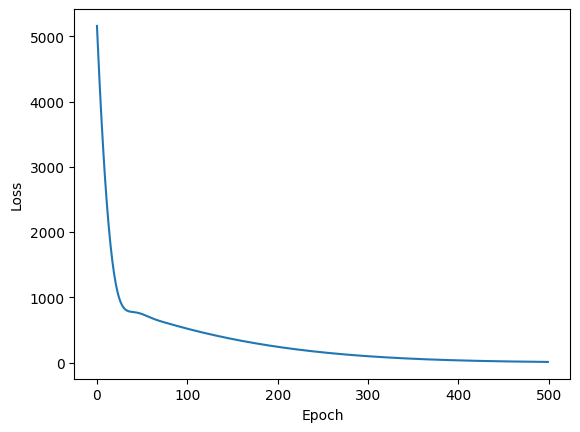

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.plot(history.history['loss'])

## Utilizar el modelo para predecir valores

Ahora tienes un modelo que ha sido entrenado para aprender la relación entre `celsius_q` y `fahrenheit_a`. Puedes usar el método `predict` para que calcule los grados Fahrenheit para grados Celsius previamente desconocidos.

Así que, por ejemplo, si el valor en Celsius es 100, ¿cuál crees que será el resultado en Fahrenheit? Haz una suposición antes de ejecutar este código.


In [9]:
print(model.predict(np.array([100.0])))   # ingresando un array de numpy a la red
#print(model.predict(tf.constant([100.0]))) # ingresando un tensor de tensorflow

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
[[211.30107]]


La respuesta correcta es $100 \times 1.8 + 32 = 212$, así que nuestro modelo está funcionando realmente bien.

### Para revisar

*   Creamos un modelo con una capa Dense.
*   Lo entrenamos con 3500 ejemplos (7 pares, durante 500 épocas).

Nuestro modelo ajustó las variables (pesos) en la capa Dense hasta que fue capaz de devolver el valor correcto en Fahrenheit para cualquier valor en Celsius. (Recuerda, 100 Celsius no era parte de nuestros datos de entrenamiento).

### EJERCICIO

Re-entrenar la red cambiando la cantidad de epochs, para comprobar el funcionamiento cuando el entrenamiento es insuficiente.

## Revisar los pesos de la capa

Finalmente, imprimamos las variables internas de la capa Dense.

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8255075]], dtype=float32), array([28.75032], dtype=float32)]


La primera variable está cerca de ~1.8 y la segunda de ~32. Estos valores (1.8 y 32) son las variables reales en la fórmula de conversión.

Esto está realmente cerca de los valores en la fórmula de conversión, ya que como vimos, para una sola neurona con una sola entrada y una sola salida, las matemáticas internas se ven igual que [la ecuación de una recta](https://en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $y = mx + b$, que tiene la misma forma que la ecuación de conversión, $f = 1.8c + 32$.

Dado que la forma es la misma, las variables deben converger en los valores estándar de 1.8 y 32, que es exactamente lo que ocurrió.

Con neuronas adicionales, entradas adicionales y salidas adicionales, la fórmula se vuelve mucho más compleja, pero la idea es la misma.

### Un pequeño experimento

Solo por diversión, ¿qué pasaría si creáramos más capas Dense con diferentes unidades, que por lo tanto también tendrían más variables?

In [11]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=50, verbose=False)
print("Entrenamiento finalizado!")
print("Predicción del valor 100 grados Celsius: {} grados Fahrenheit".format(model.predict(np.array([100.0]))))
print("Variables l0: {}".format(l0.get_weights()))
print("Variables l1: {}".format(l1.get_weights()))
print("Variabless l2: {}".format(l2.get_weights()))

Entrenamiento finalizado!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicción del valor 100 grados Celsius: [[199.18915]] grados Fahrenheit
Variables l0: [array([[-0.18398012,  0.18069032, -0.86174655,  0.18678151]],
      dtype=float32), array([ 2.6313312, -2.9219046, -3.8479486, -1.0678103], dtype=float32)]
Variables l1: [array([[ 0.09117234, -0.7554423 , -0.6403416 , -0.7528838 ],
       [ 0.19372542, -0.03778133,  1.2551165 ,  0.76030487],
       [ 0.5026486 ,  1.1480048 ,  0.6256484 ,  1.2674838 ],
       [ 0.47638604,  0.34057   , -0.15475991,  0.11668764]],
      dtype=float32), array([-2.4577677, -3.7503521, -3.5394852, -3.8963437], dtype=float32)]
Variabless l2: [array([[-0.3117242],
       [-0.8540537],
       [-0.9701195],
       [-0.8088899]], dtype=float32), array([3.3912618], dtype=float32)]


Como puedes ver, este modelo también es capaz de predecir el valor correspondiente en Fahrenheit muy bien. Pero cuando miras las variables (pesos) en las capas `l0` y `l1`, no están ni cerca de ~1.8 y ~32. La complejidad añadida oculta la forma "simple" de la ecuación de conversión.

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 4)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (408.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68 (276.00 B)

### Barrido para comparación entre red neuronal y fórmula de conversión

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


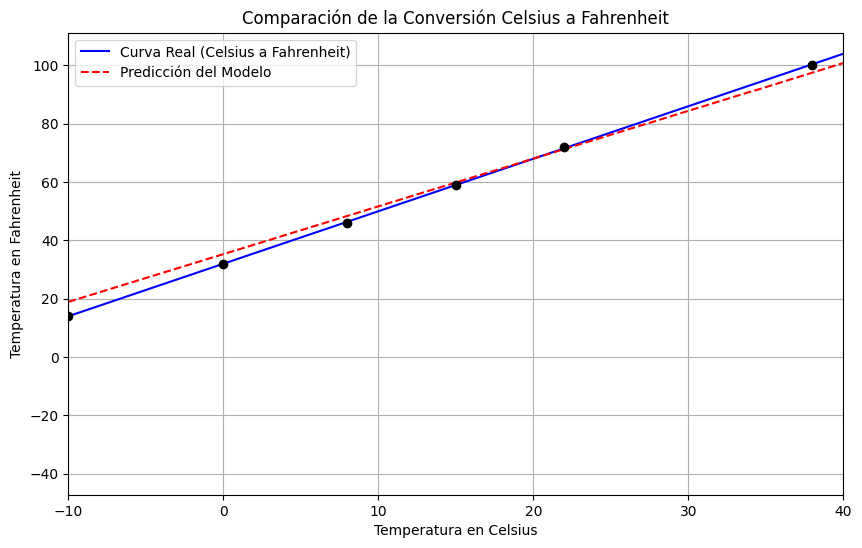

In [13]:
# Define the Celsius to Fahrenheit conversion formula
def celsius_to_fahrenheit(celsius):
    return celsius * 1.8 + 32

# Create a range of Celsius values for the sweep
celsius_range = np.linspace(-10, 40, 100)  # 100 puntos de -10°C a 40°C

# Predict the Fahrenheit values for the range of Celsius values
fahrenheit_pred = model.predict(celsius_range)

# Calculate the actual Fahrenheit values using the conversion formula
fahrenheit_actual = celsius_to_fahrenheit(celsius_range)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(celsius_range, fahrenheit_actual, label='Curva Real (Celsius a Fahrenheit)', color='blue')
plt.plot(celsius_range, fahrenheit_pred, label='Predicción del Modelo', linestyle='--', color='red')
plt.scatter(celsius_q, fahrenheit_a, color='black', zorder=5)  # puntos de entrenamiento
plt.xlabel('Temperatura en Celsius')
plt.ylabel('Temperatura en Fahrenheit')
plt.title('Comparación de la Conversión Celsius a Fahrenheit')
plt.legend()
plt.grid(True)
plt.xlim(-10, 40)
plt.show()